## Problem Statement

The number of reported results vary daily. Develop a model to explain this variation and use your model to create a prediction interval for the number of reported results on March 1, 2023. Do any attributes of the word affect the percentage of scores reported that were played in Hard Mode? If so, how? If not, why not?

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

First, read the dataset for the dates and their corresponding number of reported results, and visualize the data.

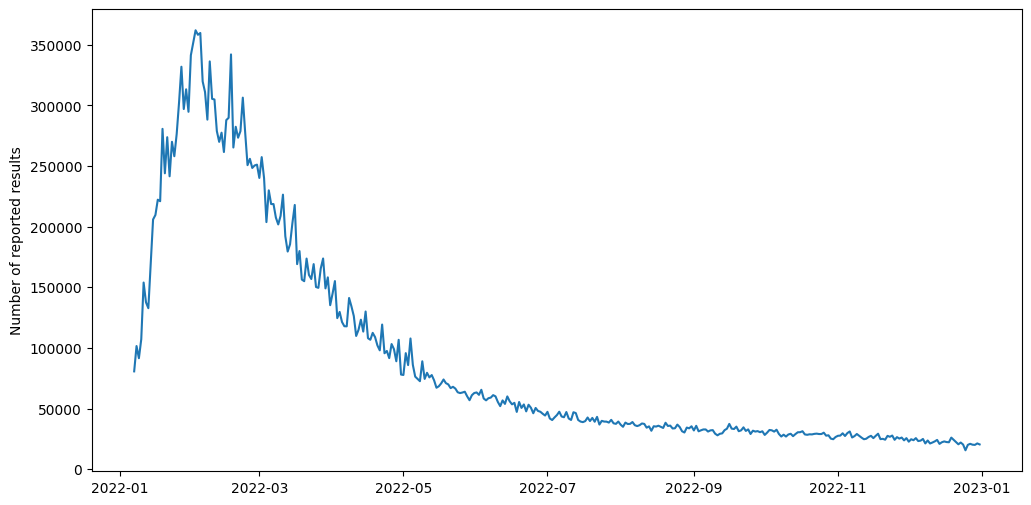

In [133]:
df = pd.read_excel("./dataset/wordle_data.xlsx", index_col=0, usecols="A,D")
df = df.sort_index()
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.ylabel("Number of reported results")
plt.show()

Notice that there is an unusual peak at the begnning three months, which seem to be the period of time when Wordle was just released and prevailed. After that, the number of reported results begin to fall to a relatively stable descending state. Therefore, we will ignore the surging part for our current model. Now we will normalize the data to the $[0,1]$ scale.

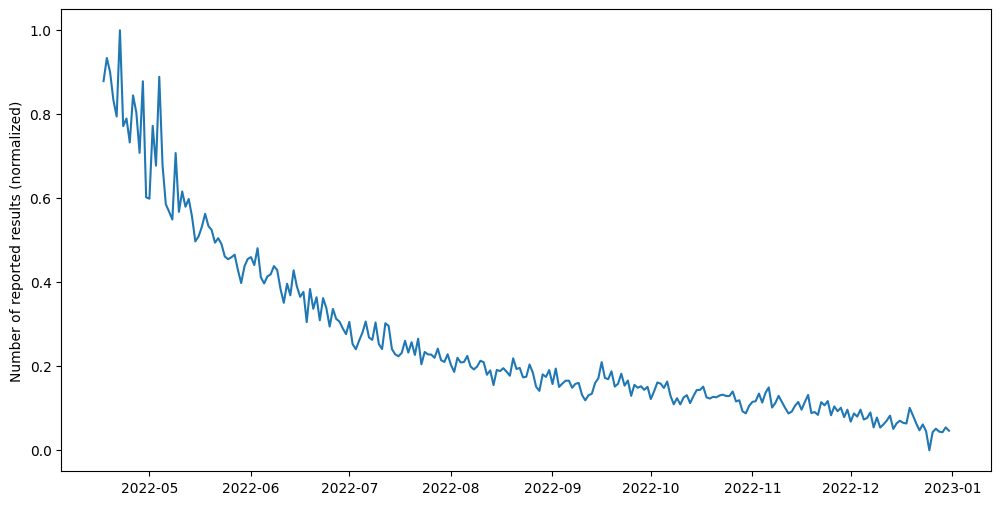

In [134]:
report_nums = df[100:]
orimin, orimax = report_nums["result_num"].min(), report_nums["result_num"].max()
report_nums = (report_nums - orimin) / (orimax - orimin)
plt.figure(figsize=(12, 6))
plt.plot(report_nums)
plt.ylabel("Number of reported results (normalized)")
plt.show()

Now we want to split the data into a training set and a testing set. By the way, note that 2023/03/01 is 418 days after the first date in the dataset, and since we ignore the first 100 data, 2023/03/01 is actually 318 days after the first data in `report_nums`.

In [135]:
date_indices = np.array(range(319))
train_date_indices = np.array(range(report_nums.size - 31))
train_report_nums = report_nums.to_numpy()[:-31].reshape(-1)
test_date_indices = np.array(range(report_nums.size - 31, report_nums.size))
test_report_nums = report_nums.to_numpy()[-31:].reshape(-1)

The curve we are going to use of the form $f(x)=a(x+b)^{-0.25}+c.$ We will train it using the training set and compute the mean squared error of the resulting prediction using the test set.

In [136]:
obj = lambda x, a, b, c: a * (x + b) ** (-0.25) + c
params, _ = curve_fit(obj, train_date_indices, train_report_nums)
mse = np.linalg.norm(test_report_nums - obj(test_date_indices, *params))
print("Mean squared error: {:.5f}".format(mse))

Mean squared error: 0.09119


Now we can plot our prediction result.

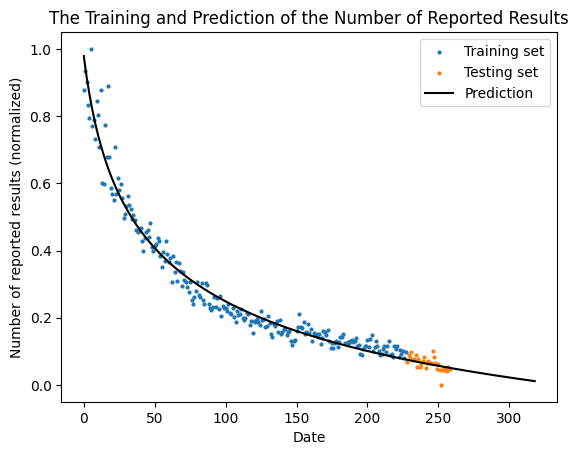

In [137]:
prediction = obj(date_indices, *params)
plt.scatter(train_date_indices, train_report_nums, s=4, label="Training set")
plt.scatter(test_date_indices, test_report_nums, s=4, label="Testing set")
plt.plot(date_indices, prediction, label="Prediction", color="black")
plt.xlabel("Date")
plt.ylabel("Number of reported results (normalized)")
plt.title("The Training and Prediction of the Number of Reported Results")
plt.legend()
plt.show()

Moreover, we can predict the number of reported results on 2023/03/01.

In [138]:
print("Result:", int(prediction[-1] * (orimax - orimin) + orimin))

Result: 16726
